### 📦 Part 1: Data Loading & Preprocessing

**Goal:**  
Import necessary libraries, load both datasets, shuffle them together, drop unused columns, and keep only the top 20 features + label.

---

#### 1. Library Imports  
- **NumPy & pandas** for data handling and manipulation  
- **Matplotlib & Seaborn** for plotting and quick EDA  
- **scikit-learn’s `metrics`** for later model evaluation  
- **warnings.filterwarnings('ignore')** to suppress unnecessary messages  

---

#### 2. Data Loading  
- Read **`legitimate_websites.csv`** and **`phishing_websites.csv`** into two DataFrames  
- **Concatenate** them vertically (`pd.concat`) to form one unified dataset  
- **Shuffle** all rows (`.sample(frac=1)`) to mix classes  

---

#### 3. Column Cleanup  
- **Drop** raw URL (`'URL'`) and the unused `'Hppts'` column  
- **Define** the top 20 features (from prior feature-importance analysis)  
- **Append** the `'label'` column so we still have our target  

---

#### 4. Preview  
- Use **`.head()`** to confirm the resulting DataFrame schema  

---

>
> **“Load → Shuffle → Drop → Select → Preview”**  
> - **Load** (CSV files)  
> - **Shuffle** (mix rows)  
> - **Drop** (unused columns)  
> - **Select** (Top 20 features + `label`)  
> - **Preview** (`.head()`)  


In [1]:
# 1. Import libraries for data, plotting, metrics, and warnings control
# %pip install seaborn
import numpy as np                                      # Numerical operations (arrays, math)
import pandas as pd                                     # DataFrames & CSV I/O
import matplotlib.pyplot as plt                         # Plotting library

# Use interactive plots in VS Code only if available
try:
    from IPython.core.getipython import get_ipython
    ipy = get_ipython()
    if ipy is not None:
        ipy.run_line_magic('matplotlib', 'widget')
except Exception:
    pass

import seaborn as sns                                   # Statistical visualization
from sklearn import metrics                             # Performance metrics for ML models
import warnings
warnings.filterwarnings('ignore')                       # Suppress warning messages

# 2. Load phishing and legitimate URL datasets
legitimate_df = pd.read_csv("legitimate_websites.csv")  # Legitimate websites
phishing_df = pd.read_csv("phishing_websites.csv")      # Phishing websites

# 3. Combine and shuffle both DataFrames into one
df = pd.concat([legitimate_df, phishing_df], axis=0)    # Stack rows from both
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle all rows randomly and reset index

# 4. Remove columns we won’t use in modeling
df = df.drop(['Hppts', 'URL'], axis=1)                  # Drop raw URL & unused 'Hppts'

# 5. Specify the Top 20 most important features + the label
desired_features = [
    'number_of_href', 'number_of_list', 'length_of_text',
    'prefixSuffix', 'number_of_a', 'has_link',
    'number_of_hidden_element', 'WebsiteForwarding',
    'number_of_div', 'number_of_forms', 'SubDomains',
    'number_of_images', 'number_of_script', 'longUrl',
    'number_of_meta', 'shortUrl', 'length_of_title',
    'number_of_paragraph', 'number_of_span',
    'LinksPointingToPage'
]
desired_features.append('label')                       # Add the target column

# 6. (Optional) Keep only these columns for a lean dataset
# df = df[desired_features]

# 7. Preview the first few rows to confirm structure
df.head()


,has_title,has_submit,has_link,has_email_input,number_of_inputs,number_of_buttons,number_of_images,number_of_option,number_of_list,number_of_href,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,label
0,1,0,1,0,1,2,0,0,0,2,...,0,1,0,0,0,0,1,0,1,1
1,1,0,1,0,10,8,32,4,24,133,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,1,0,1,0,0,3,135,0,27,122,...,0,1,0,0,0,0,1,0,1,0


## 2. Visualizing the Data:

(20226, 74)


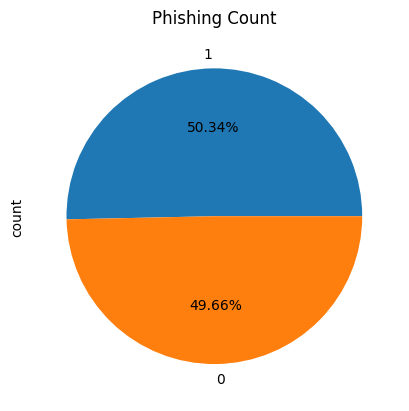

In [2]:
print(df.shape)
df['label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [3]:
#description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
has_title,20226.0,0.923564,0.265701,0.0,1.0,1.0,1.0,1.0
has_submit,20226.0,0.104371,0.305748,0.0,0.0,0.0,0.0,1.0
has_link,20226.0,0.701276,0.457710,0.0,0.0,1.0,1.0,1.0
has_email_input,20226.0,0.082122,0.274557,0.0,0.0,0.0,0.0,1.0
number_of_inputs,20226.0,4.584297,40.755906,0.0,0.0,0.0,2.0,2382.0
...,...,...,...,...,...,...,...,...
PageRank,20226.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
GoogleIndex,20226.0,0.991941,0.089411,0.0,1.0,1.0,1.0,1.0
LinksPointingToPage,20226.0,0.425294,0.494400,0.0,0.0,0.0,1.0,1.0
StatsReport,20226.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


## 3.  Train–Test Split:
**Goal:**  
Separate features (`X`) from the target (`y`), then split into training and test sets (80% train, 20% test) to evaluate model performance on unseen data.

---

In [4]:
# 1. Define feature matrix X and target vector y
X = df.drop(["label"], axis=1)     # All columns except 'label' become predictors
y = df["label"]                    # 'label' column is our binary target (0 = legit, 1 = phishing)

# 2. Import the train_test_split utility
from sklearn.model_selection import train_test_split

# 3. Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X,                # Feature matrix
    y,                # Target vector
    test_size=0.2,    # 20% of data for testing
    random_state=10   # Seed for reproducibility
)

# 4. Inspect the resulting shapes to confirm the split
print("X_train shape:", X_train.shape)  # e.g. (n_train_samples, n_features)
print("y_train shape:", y_train.shape)  # e.g. (n_train_samples,)
print("X_test shape: ", X_test.shape)   # e.g. (n_test_samples, n_features)
print("y_test shape: ", y_test.shape)   # e.g. (n_test_samples,)


X_train shape: (16180, 73)
y_train shape: (16180,)
X_test shape:  (4046, 73)
y_test shape:  (4046,)


## 4. Model Building & Training

**Goal:**  
Train six different classifiers on our features and record their performance (accuracy, F1‑score, recall, precision) along with prediction times.

**Models to Evaluate:**  
1. **k‑Nearest Neighbors (KNN)**  
2. **Decision Tree**  
3. **Random Forest**  
4. **Gradient Boosting**  
5. **CatBoost**  
6. **XGBoost**  


In [5]:
### 4.1 Initialize Performance Holders
# Lists to store names and metrics for each model
ML_Model = []             # Will hold model names (e.g., "KNN", "DecisionTree")
accuracy = []             # Will hold accuracy scores
f1_score = []             # Will hold F1‑scores
recall = []               # Will hold recall scores
precision = []            # Will hold precision scores
prediction_time = []      # Will hold time taken for predictions

#function to call for storing the results
def storeResults(model, a, b, c, d, pred_time):
    """
    Append performance metrics for a single model run.

    Parameters:
    - model (str): Name of the trained model
    - a (float): Accuracy score
    - b (float): F1‑score
    - c (float): Recall score
    - d (float): Precision score
    - pred_time (float): Time taken to predict on the test set (seconds)
    """
    ML_Model.append(model)             # Save the model name
    accuracy.append(round(a, 3))       # Round and save accuracy
    f1_score.append(round(b, 3))       # Round and save F1‑score
    recall.append(round(c, 3))         # Round and save recall
    precision.append(round(d, 3))      # Round and save precision
    prediction_time.append(round(pred_time, 3))  # Round and save timing


### 4.1 k‑Nearest Neighbors (KNN)

**Goal:**  
Identify the best **k** (number of neighbors) by evaluating how KNN classification accuracy changes with different k values, using 5‑fold cross‑validation.

---

#### 🔬 What Is KNN?

- **Instance‑based learning**: KNN doesn’t build a global model. Instead, it **stores all training examples**.  
- **Distance metric**: To classify a new point, KNN finds the **k** closest training points (neighbors) according to a distance function (usually **Euclidean**):  



- **Majority vote**: The new point is assigned to the class most common among its k nearest neighbors.  

---

#### 🔧 Why Standardize Features?

- KNN relies on distances; features with larger scales dominate.  
- **StandardScaler** transforms each feature to **zero mean** and **unit variance** so all features contribute equally.

---

#### ⚙️ Cross‑Validation Procedure

1. **Loop k from 1 to 19**  
2. For each k, instantiate `KNeighborsClassifier(n_neighbors=k)`.  
3. Use `cross_val_score(… cv=5, scoring='accuracy')` to estimate performance on unseen folds.  
4. Store the **mean accuracy** for each k.  
5. **Plot** k vs. mean CV accuracy to locate the peak (optimal k).

---


**KNN in 4 Simple Steps (and a Memory Hook)**

1. **What KNN Does**  
   - Analogy: You ask your **k closest neighbors** (past examples) for their class and take a majority vote.

2. **Why We Scale First**  
   - Without scaling, features on larger scales dominate distance calculations.
   - **StandardScaler** ensures zero mean and unit variance.

3. **Finding the Best k (Cross‑Validation)**  
   - Test **k = 1–19**  
     1. Split data into 5 folds.  
     2. Train on 4 folds, test on 1; repeat.  
     3. Average accuracy per k.  
   - Plot accuracy vs. k and pick the peak.

4. **Memory Mnemonic: “S‑C‑P‑P”**  
   - **S**cale → **C**ross‑validate → **P**lot → **P**ick  

---
### Assistant Deep Dive

**Deep Dive into KNN—Yet Simple & Memorizable**

1. **Core Idea: “Neighborhood Voting”**  
   - KNN stores all examples, then for a new point measures distances, selects **k** neighbors, and votes on their labels.

2. **Why Distance Matters**  
   - Uses Euclidean distance; feature scales must be balanced.

3. **Scaling: Leveling the Playing Field**  
   - StandardScaler centers and scales features.

4. **Choosing k: Balancing Bias & Variance**

   | k Value     | Effect                                    | Risk                         |
   |-------------|-------------------------------------------|------------------------------|
   | Small (1–3) | Jagged decisions, sensitive to noise       | Overfitting (high variance)  |
   | Medium      | Smooth boundary, captures true patterns    | Sweet spot                   |
   | Large (>20) | Almost flat boundary, ignores nuances      | Underfitting (high bias)     |

   - Cross‑Validate and plot to find the optimal k.

5. **Memorable Mnemonic: “S‑D‑V‑P”**  
   1. **S**tore examples  
   2. **D**istance  
   3. **V**ote  
   4. **P**redict  

6. **Quick Checklist**  
   - Scale features  
   - Choose distance metric  
   - Range for k  
   - 5‑fold CV  
   - Plot & pick  



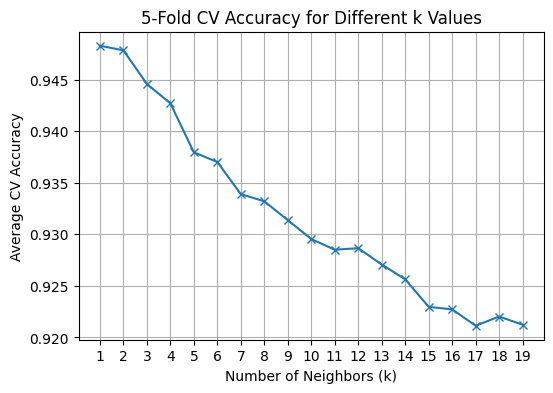

Best n_neighbors Value: 1
Highest CV Accuracy: 0.948


In [6]:
# 1. Import required modules for KNN, scaling, and CV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 2. Standardize features so distance metrics aren’t skewed by scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)        # Fit to X, then transform: zero mean, unit variance

# 3. Define range of k values to test (1 to 19)
k_values = range(1, 20)
cv_scores = []                            # To collect mean CV accuracy for each k

# 4. Loop over each k, perform 5‑fold CV, and store average accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)               # Instantiate KNN with k neighbors
    scores = cross_val_score(
        knn,               # Model
        X_scaled,          # Scaled feature matrix
        y,                 # True labels
        cv=5,              # 5‑fold cross‑validation
        scoring='accuracy' # Evaluate by accuracy
    )
    cv_scores.append(np.mean(scores))  # Compute mean accuracy over folds

# 5. Plot cross‑validation accuracy vs. k
plt.figure(figsize=(6, 4))
plt.plot(k_values, cv_scores, marker='x', linestyle='-')
plt.title('5‑Fold CV Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average CV Accuracy')
plt.xticks(k_values)           # Show all integer ticks from 1 to 19
plt.grid(True)                 # Add grid lines for readability
plt.show()                     # Display the plot

# 6. Identify best k value
best_k = k_values[np.argmax(cv_scores)]  # k with highest average accuracy
print(f"Best n_neighbors Value: {best_k}")
print(f"Highest CV Accuracy: {max(cv_scores):.3f}")


### Train the best Model:
# K‑Nearest Neighbors: Scaling, Timing & Metrics

This snippet shows how to:
1. Standardize features via `StandardScaler`.  
2. Train a 1‑NN classifier.  
3. Measure model training and prediction times.  
4. Compute key performance metrics (accuracy, F1, recall, precision).


In [7]:
# ## KNN Model: Scaling, Training, Timing, and Performance Metrics
#
# This script demonstrates how to:
# 1. Scale features using StandardScaler
# 2. Train a 1-NN classifier
# 3. Measure training and prediction times
# 4. Compute key performance metrics (accuracy, F1, recall, precision)

from sklearn.preprocessing import StandardScaler          # Import scaler for feature standardization
from sklearn.neighbors import KNeighborsClassifier       # Import KNN classifier
import time                                             # Import time module for timing operations
from sklearn import metrics                            # Import metrics module for evaluation

# Assuming X_train and X_test are your feature matrices
scaler = StandardScaler()                              # Instantiate the StandardScaler

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)         # Fit to training data and transform it
X_test_scaled = scaler.transform(X_test)               # Transform test data using same parameters

# Instantiate the KNN model
knn = KNeighborsClassifier(n_neighbors=1)              # Create KNN with k=1

# Fit the model using the scaled data
start_train = time.time()                              # Record start time for training
knn.fit(X_train_scaled, y_train)                       # Train the KNN classifier
end_train = time.time()                                # Record end time for training
train_time = end_train - start_train                   # Compute total training time

# Measure prediction time for training data
start_predict_train = time.time()                      # Record start time for train predictions
y_train_knn = knn.predict(X_train_scaled)              # Predict on training set
end_predict_train = time.time()                        # Record end time for train predictions
predict_train_time = end_predict_train - start_predict_train  # Compute prediction time on training data

# Measure prediction time for test data
start_predict_test = time.time()                       # Record start time for test predictions
y_test_knn = knn.predict(X_test_scaled)                # Predict on test set
end_predict_test = time.time()                         # Record end time for test predictions
predict_test_time = end_predict_test - start_predict_test      # Compute prediction time on test data

# Output the times
print(f"Training Time: {train_time:.4f} seconds")        # Display training duration
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")  # Display train prediction duration
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")      # Display test prediction duration

# Computing accuracy, F1-score, recall, precision for both training and test sets
acc_train_knn = metrics.accuracy_score(y_train, y_train_knn)      # Calculate training accuracy
acc_test_knn = metrics.accuracy_score(y_test, y_test_knn)         # Calculate test accuracy
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))  # Print train accuracy
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))       # Print test accuracy
print()                                                            # Blank line for readability

f1_score_train_knn = metrics.f1_score(y_train, y_train_knn)       # Compute F1-score for training data
f1_score_test_knn = metrics.f1_score(y_test, y_test_knn)          # Compute F1-score for test data
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))  # Print train F1
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))       # Print test F1
print()                                                            # Blank line

recall_score_train_knn = metrics.recall_score(y_train, y_train_knn)  # Compute recall for training data
recall_score_test_knn = metrics.recall_score(y_test, y_test_knn)     # Compute recall for test data
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))  # Print train recall
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))       # Print test recall
print()                                                            # Blank line

precision_score_train_knn = metrics.precision_score(y_train, y_train_knn)  # Compute precision for training data
precision_score_test_knn = metrics.precision_score(y_test, y_test_knn)     # Compute precision for test data
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))  # Print train precision
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))       # Print test precision

from sklearn.metrics import classification_report        # Import function for detailed report
import pandas as pd                                     # Import pandas for DataFrame handling

# Generate classification report as dictionary
report = classification_report(y_test, y_test_knn, output_dict=True)   # Compute detailed metrics

# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()           # Transpose for readability
print(report_df)
# Drop 'weighted avg' row and 'support' column
report_df = report_df.drop(['weighted avg'], axis=0)   # Remove weighted averages
report_df = report_df.drop(['support'], axis=1)        # Remove support column

# Print the modified report
print(report_df)                                       # Display the final metrics table


Training Time: 0.0249 seconds
Prediction Time on Training Data: 5.8359 seconds
Prediction Time on Test Data: 1.3210 seconds
K-Nearest Neighbors : Accuracy on training Data: 0.987
K-Nearest Neighbors : Accuracy on test Data: 0.951

K-Nearest Neighbors : f1_score on training Data: 0.987
K-Nearest Neighbors : f1_score on test Data: 0.952

K-Nearest Neighborsn : Recall on training Data: 0.989
Logistic Regression : Recall on test Data: 0.959

K-Nearest Neighbors : precision on training Data: 0.986
K-Nearest Neighbors : precision on test Data: 0.944
              precision    recall  f1-score      support
0              0.957953  0.942202  0.950013  2007.000000
1              0.944015  0.959294  0.951593  2039.000000
accuracy       0.950816  0.950816  0.950816     0.950816
macro avg      0.950984  0.950748  0.950803  4046.000000
weighted avg   0.950929  0.950816  0.950809  4046.000000
           precision    recall  f1-score
0           0.957953  0.942202  0.950013
1           0.944015  0.95

### Store Results:

In [8]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn, predict_test_time)

## 4.2. Decision Trees: Cross‑Validation with Normalization

**Objective:**  
Optimize the complexity of a Decision Tree by tuning its `max_depth` hyperparameter, using 5‑fold cross‑validation on normalized features.  

### Why Normalize?  
Most tree‑based models are *invariant* to monotonic transforms of individual features, but when used in combination with distance‑based preprocessing or pipelines, consistent scaling can help:

- **StandardScaler** subtracts the mean and divides by the standard deviation feature‑wise.
- Ensures that any downstream algorithm (or combined pipeline) sees features on a comparable scale.
- Improves numerical stability during model fitting.

### Why Cross‑Validation?  
- **5‑fold CV** provides a robust estimate of the model’s generalization performance by training on 80% of the data and validating on 20%, repeated across 5 splits.  
- Averaging the accuracy across folds reduces variance caused by any one particular train/test split.

### Hyperparameter Sweep: `max_depth`  
- A shallow tree (`max_depth` small) may **underfit** (too simple to capture structure).  
- A deep tree (`max_depth` large) may **overfit** (memorizes noise).  
- We evaluate depths from 1 to 29 to locate the sweet‑spot that balances bias and variance.

### What the Plot Shows  
- **X‑axis:** Candidate tree depths (1…29).  
- **Y‑axis:** Mean cross‑validation accuracy for each depth.  
- Peaks indicate depths where the model best balances under/over‑fitting.  

### Interpreting the Outputs  
1. **Best `max_depth`:** The value yielding the highest CV accuracy.  
2. **Best CV Accuracy:** How well the optimally‑tuned tree would perform on unseen data (estimated).  
3. **Average CV Accuracy:** Overall average across *all* tested depths—gives a sense of baseline performance when ignoring hyperparameter choice.

---


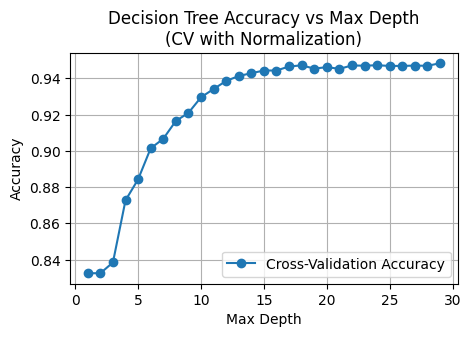

Best max_depth: 29
Best Cross-Validation Accuracy: 0.948
Average Cross-Validation Accuracy: 0.924


In [9]:
from sklearn.tree import DecisionTreeClassifier                # Decision Tree classifier
from sklearn.model_selection import cross_val_score            # cross-validation utility
from sklearn.preprocessing import StandardScaler               # feature normalizer
import matplotlib.pyplot as plt                                # plotting library
import numpy as np                                             # numerical operations

# Normalize the data
scaler = StandardScaler()                                      # create a scaler instance
X_train_scaled = scaler.fit_transform(X_train)                 # fit scaler on X_train & transform

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []                                          # will collect mean accuracies

# Try max_depth from 1 to 29
depth = range(1, 30)                                           # candidate tree depths

for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)            # instantiate tree with max_depth=n

    # Perform 5-fold cross-validation and compute mean accuracy on scaled data
    scores = cross_val_score(
        tree_test,
        X_train_scaled,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_mean_accuracy.append(np.mean(scores))                   # record mean accuracy for this depth

# Plotting cross-validation accuracy vs. max_depth
plt.figure(figsize=(5, 3))                                     # set figure size
plt.plot(
    depth,
    cv_mean_accuracy,
    label="Cross-Validation Accuracy",
    marker='o'
)
plt.ylabel("Accuracy")                                         # y-axis label
plt.xlabel("Max Depth")                                        # x-axis label
plt.title("Decision Tree Accuracy vs Max Depth\n(CV with Normalization)")  # plot title
plt.legend()                                                   # show legend
plt.grid(True)                                                 # enable grid
plt.show()                                                     # render the plot

# Find and report the best max_depth and corresponding accuracy
best_index    = np.argmax(cv_mean_accuracy)                    # index of highest accuracy
best_max_depth = depth[best_index]                             # depth at that index
best_accuracy  = cv_mean_accuracy[best_index]                  # best accuracy value

# Calculate the average accuracy across all tested depths
average_accuracy = np.mean(cv_mean_accuracy)                   # overall mean accuracy

# Output the results
print(f"Best max_depth: {best_max_depth}")                     # best tree depth
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")  # best CV accuracy
print(f"Average Cross-Validation Accuracy: {average_accuracy:.3f}")  # mean across depths

### Train Best Decision Tree Model

This snippet shows how to:
1. Normalize features with `StandardScaler`.  
2. Instantiate and train a `DecisionTreeClassifier` with the chosen `max_depth`.  
3. Measure training & prediction times.  
4. Compute performance metrics (accuracy, F1, recall, precision).  
5. Generate a clean classification report.

In [10]:
from sklearn.tree import DecisionTreeClassifier      # import the Decision Tree algorithm
from sklearn.preprocessing import StandardScaler     # import scaler for normalization
from sklearn.metrics import classification_report    # import detailed report generator
import pandas as pd                                 # import pandas for DataFrame handling
import time                                         # import time module for timing operations
import matplotlib.pyplot as plt                     # import plotting library (if needed)

# Normalize the data using StandardScaler
scaler = StandardScaler()                           # create StandardScaler instance
X_train_scaled = scaler.fit_transform(X_train)      # fit on training data & transform
X_test_scaled  = scaler.transform(X_test)           # transform test data with same scaler

# Instantiate the Decision Tree model with chosen depth
tree = DecisionTreeClassifier(max_depth=28)         # set max_depth to 28

# Train the model on the full scaled training set
start_train = time.time()                           # record training start time
tree.fit(X_train_scaled, y_train)                   # train the decision tree
end_train   = time.time()                           # record training end time
train_time  = end_train - start_train               # compute training duration

# Measure prediction time for training data
start_predict_train = time.time()                   # record prediction start on train set
y_train_tree = tree.predict(X_train_scaled)         # predict labels for training data
end_predict_train   = time.time()                   # record prediction end on train set
predict_train_time  = end_predict_train - start_predict_train  # compute train-prediction time

# Measure prediction time for test data
start_predict_test = time.time()                    # record prediction start on test set
y_test_tree = tree.predict(X_test_scaled)           # predict labels for test data
end_predict_test   = time.time()                    # record prediction end on test set
predict_test_time  = end_predict_test - start_predict_test     # compute test-prediction time

# Output training and prediction times
print(f"Training Time: {train_time:.4f} seconds")          # display training time
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")  # display train-pred time
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")       # display test-pred time

# Compute accuracy, F1-score, recall, precision for training & test sets
from sklearn import metrics                               # import metrics module

acc_train_tree = metrics.accuracy_score(y_train, y_train_tree)  # compute train accuracy
acc_test_tree  = metrics.accuracy_score(y_test,  y_test_tree)   # compute test accuracy
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))  # print train accuracy
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))        # print test accuracy
print()                                                         # blank line for readability

f1_score_train_tree = metrics.f1_score(y_train, y_train_tree)   # compute train F1-score
f1_score_test_tree  = metrics.f1_score(y_test,  y_test_tree)    # compute test F1-score
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))  # print train F1
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))        # print test F1
print()                                                                                   # blank line

recall_score_train_tree = metrics.recall_score(y_train, y_train_tree)  # compute train recall
recall_score_test_tree  = metrics.recall_score(y_test,  y_test_tree)   # compute test recall
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))  # print train recall
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))       # print test recall
print()                                                                                   # blank line

precision_score_train_tree = metrics.precision_score(y_train, y_train_tree)  # compute train precision
precision_score_test_tree  = metrics.precision_score(y_test,  y_test_tree)   # compute test precision
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))  # print train precision
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))        # print test precision

# Generate a classification report as a DataFrame
report = classification_report(y_test, y_test_tree, output_dict=True)  # detailed metrics dict
report_df = pd.DataFrame(report).transpose()                           # convert to DataFrame & transpose

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)  # remove weighted average row
report_df = report_df.drop(['support'], axis=1)       # remove support column

# Print the classification report
print("Classification Report:")    # header for the report
print(report_df)                   # display the cleaned report DataFrame

Training Time: 2.4755 seconds
Prediction Time on Training Data: 0.0097 seconds
Prediction Time on Test Data: 0.0046 seconds
Decision Tree : Accuracy on training Data: 0.993
Decision Tree : Accuracy on test Data: 0.954

Decision Tree : f1_score on training Data: 0.993
Decision Tree : f1_score on test Data: 0.955

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.963

Decision Tree : precision on training Data: 0.995
Decision Tree : precision on test Data: 0.946
Classification Report:
           precision    recall  f1-score
0           0.961929  0.944195  0.952980
1           0.946050  0.963217  0.954557
accuracy    0.953782  0.953782  0.953782
macro avg   0.953990  0.953706  0.953768


## 4.3. Feature Importance & Top‑20 Visualization

**Objective:**  
Understand which input variables your Decision Tree relies on most heavily by examining `feature_importances_`. Highlighting the top 20 gives insights into:

- **Model interpretability**: which signals (URL properties, HTML counts, JS behaviors, etc.) drive the phishing decision.  
- **Feature selection**: you might later drop low‑importance features to simplify models or reduce runtime.  
- **Domain knowledge**: seeing, for example, that “number_of_forms” or “UsingIp” ranks highly validates your feature engineering.

---

### Key Steps

1. **Build a DataFrame of importances**  
   - Column `'feature'`: the original feature names (`X_train.columns`).  
   - Column `'importance'`: the numeric importance values from your trained tree (`tree.feature_importances_`).

2. **Sort & select**  
   - Sort by descending importance to rank features.  
   - Slice the top 20 for focused analysis.

3. **Tabular output**  
   - Print the list of top features so you can quickly reference which ones matter most.

4. **Visualization with a horizontal bar chart**  
   - Horizontal bars allow long feature names to be read easily.  
   - Invert the y‑axis so the most important feature appears at the top.  
   - Annotate axes and title for clarity.

---

### Why This Matters

- **Insight into complex models**  
  Decision Trees are already interpretable, but visualizing importances helps communicate to stakeholders which aspects of a website (e.g., the presence of suspicious scripts vs. URL length) are driving alerts.

- **Guiding further feature engineering**  
  If certain features consistently show near‑zero importance, consider removing or reworking them, focusing effort on those that truly differentiate phishing from legitimate pages.

- **Model simplification**  
  A smaller, high‑quality feature set can speed up prediction and reduce overfitting in downstream ensemble methods (e.g., Random Forests).

---

Top 20 Features:
['number_of_href', 'length_of_text', 'prefixSuffix', 'has_link', 'number_of_div', 'number_of_a', 'length_of_title', 'WebsiteForwarding', 'number_of_hidden_element', 'SubDomains', 'number_of_images', 'number_of_meta', 'number_of_span', 'shortUrl', 'number_of_script', 'number_of_paragraph', 'longUrl', 'has_text_input', 'LinksPointingToPage', 'number_of_list']


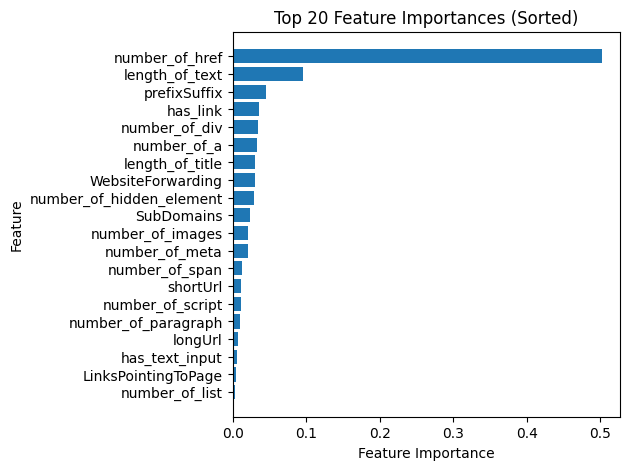

In [11]:
# Calculate feature importance and sort them
feature_importance = pd.DataFrame({                     # build DataFrame with two columns
    'feature': X_train.columns,                         # column names from training set
    'importance': tree.feature_importances_             # importance values from trained tree
})
feature_importance_sorted = feature_importance.sort_values('importance', ascending=False)
                                                       # sort by importance descending

# Select and print the top 20 most important features
top_20_features = feature_importance_sorted.head(20)   # take first 20 rows
print("Top 20 Features:")                              # header for clarity
print(top_20_features['feature'].tolist())             # list only the feature names

# Plot the top 20 features
plt.figure(figsize=(5, 5))                             # create a new figure, square aspect
plt.barh(                                             # horizontal bar chart
    range(len(top_20_features)),                      # y positions 0–19
    top_20_features['importance'],                     # bar lengths = importance values
    align='center'                                     # center bars on y‐ticks
)
plt.yticks(                                           # set custom y‐tick labels
    range(len(top_20_features)),                      # positions 0–19
    top_20_features['feature'].tolist()               # convert Series to list for labels
)
plt.title("Top 20 Feature Importances (Sorted)")       # chart title
plt.xlabel("Feature Importance")                       # x‐axis label
plt.ylabel("Feature")                                  # y‐axis label
plt.gca().invert_yaxis()                               # invert y‐axis so highest on top
plt.show()                                             # render the plot


**How It Works**  
1. **DataFrame Construction**  
   We create a two‑column DataFrame mapping each feature name to its importance score.  
2. **Sorting**  
   `sort_values(…, ascending=False)` ranks features from most to least important.  
3. **Selection**  
   `.head(20)` picks the top 20 entries for concise reporting.  
4. **Printing**  
   Converting the feature names to a list makes it easy to read or log elsewhere.  
5. **Visualization**  
   A horizontal bar chart with inverted y‑axis places the most important feature at the top for immediate clarity.


## 4.4. Visualize the Trained Decision Tree

**Objective:**  
Gain a complete, intuitive picture of how your Decision Tree makes predictions by rendering its entire structure:

- **Nodes** represent decision points based on feature thresholds.  
- **Branches** show the flow from root to leaves, splitting on feature values.  
- **Leaf nodes** indicate final class assignments and purity.  

### Why Visualize a Decision Tree?

1. **Interpretability:**  
   You can see exactly which features are used, in what order, and the threshold values that trigger splits.  
2. **Debugging & Validation:**  
   Unusual or overly complex branches can hint at overfitting or flawed features.  
3. **Communication:**  
   A visual tree helps non‑technical stakeholders understand model logic.  

---

### Key Steps

1. **Instantiate & Fit**  
   - Create a `DecisionTreeClassifier` with your chosen `max_depth` (e.g. 28).  
   - Train on the full, normalized training set (`X_train_scaled`, `y_train`).  

2. **Plot with `plot_tree`**  
   - `filled=True` shades nodes by the dominant class (darker = purer).  
   - `feature_names` labels each split with the feature used.  
   - `class_names` annotates leaf nodes with “legitimate” vs. “phishing” (or Class 0, Class 1).  
   - `rounded=True` gives a polished look with rounded rectangles.  

3. **Figure Sizing & Layout**  
   - Trees can be very wide/deep—use a large figure size (e.g. 20×10 inches).  
   - Call `plt.tight_layout()` if labels overlap.  

---

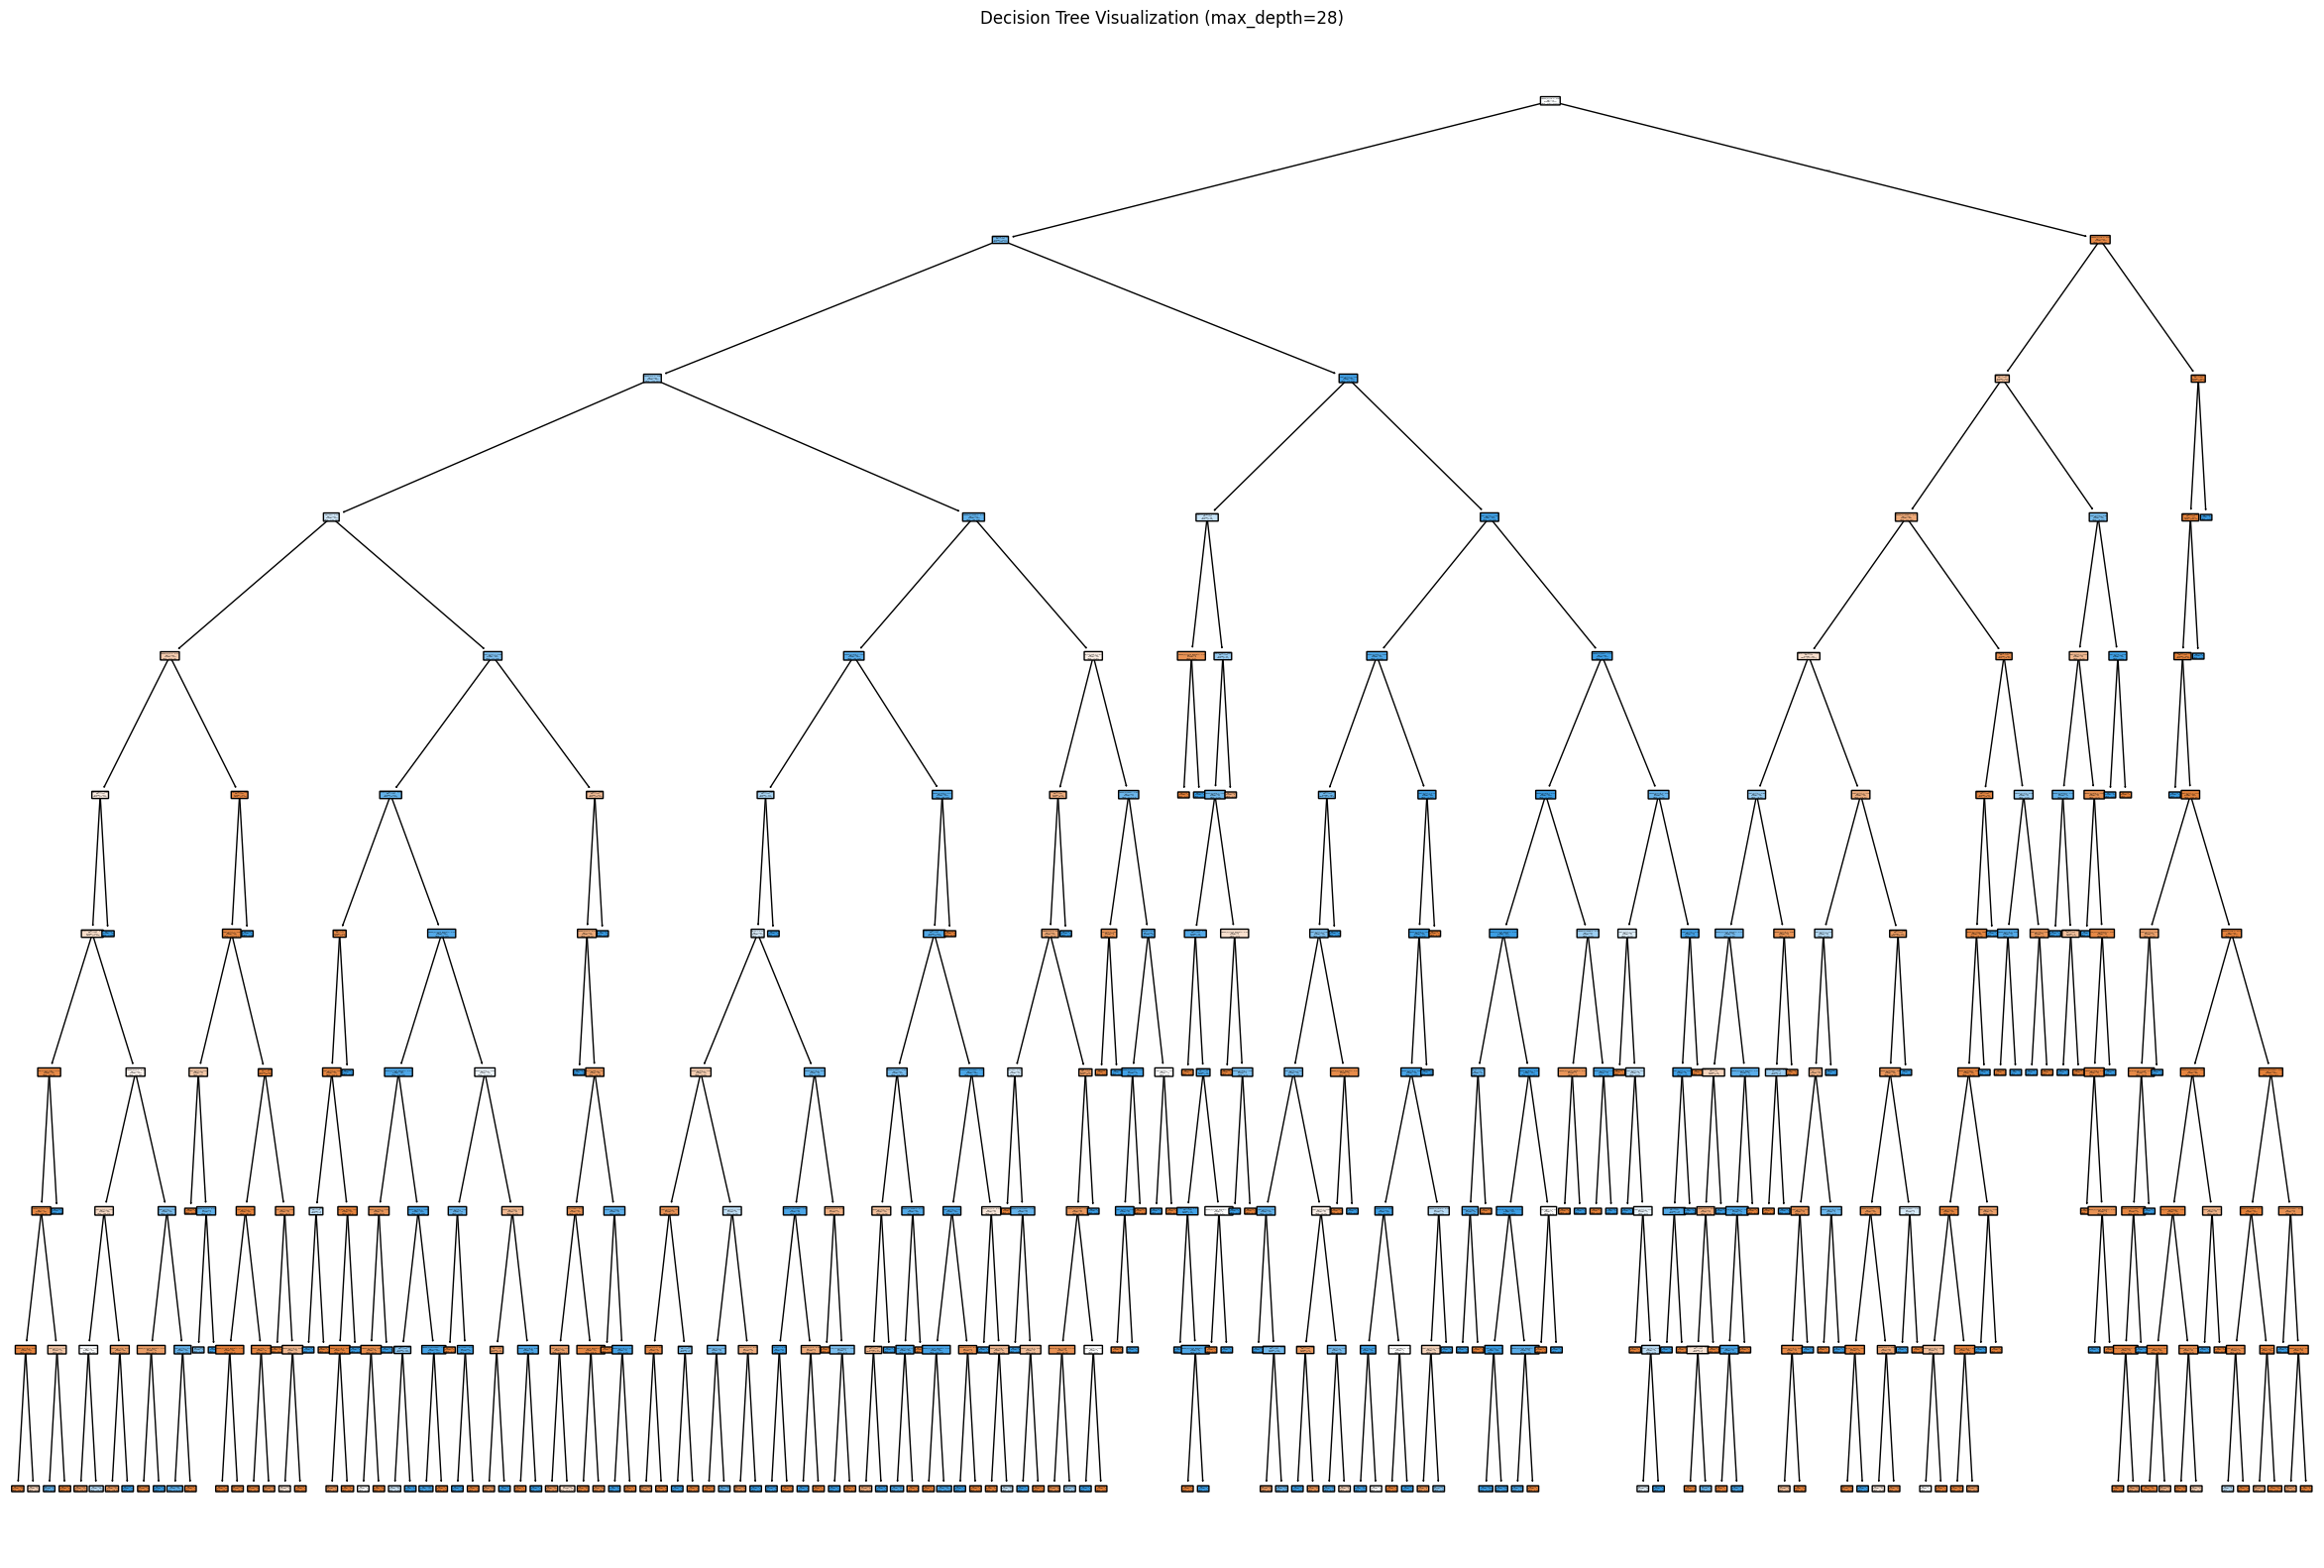

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # import Decision Tree and plotting utility
import matplotlib.pyplot as plt                             # import matplotlib for plotting

# Train a decision tree classifier with a specific max_depth
tree = DecisionTreeClassifier(max_depth=10)                # instantiate the tree with depth = 28
tree.fit(X_train_scaled, y_train)                          # fit the model on scaled training data

# Plot the decision tree
plt.figure(figsize=(30, 20))                                # create a large figure (width=20, height=10 inches)
plot_tree(
    tree,                                                   # the trained tree to visualize
    filled=True,                                            # color nodes by class purity
    feature_names=X_train.columns,                          # use original feature names on splits
    class_names=['Class 0', 'Class 1'],                     # labels for target classes
    rounded=True                                            # draw nodes with rounded corners
)
plt.title(f"Decision Tree Visualization (max_depth={28})")  # add a title showing the chosen depth
plt.show()                                                  # render the plot

### Store Results

In [13]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree, predict_test_time)

## 4.3. Random Forest: Cross‑Validation

**Objective:**  
Determine the optimal number of trees (`n_estimators`) in a Random Forest by sweeping over values 1–29 and using 5‑fold cross‑validation on the training set.  

### Why Tune `n_estimators`?  
- **Bias‑variance trade‑off**:  
  - Too few trees → high variance (unstable predictions).  
  - More trees → lower variance, but with diminishing returns and increased training/inference cost.  
- **Ensemble stability**: A larger forest typically smooths out individual tree noise.  

### Key Steps

1. **Define Sweep Range**  
   - Explore `n_estimators` from 1 to 29.  
2. **Cross‑Validation**  
   - For each forest size, perform 5‑fold CV to estimate generalization accuracy.  
   - Use the mean accuracy across folds as your evaluation metric.  
3. **Record & Plot**  
   - Keep a list of mean accuracies indexed by forest size.  
   - Plot accuracy vs. number of trees to visualize where returns plateau.  
4. **Identify Best Value**  
   - Use `np.argmax` to find the `n_estimators` with the highest CV accuracy.  

---

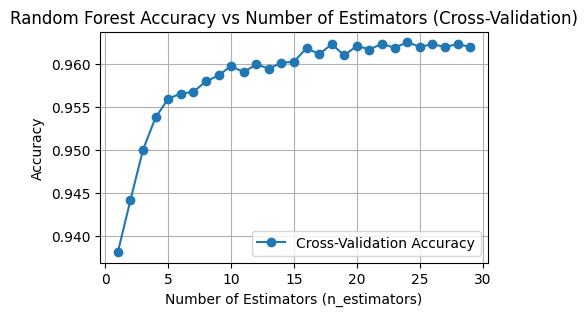

Best n_estimators: 24
Best Cross-Validation Accuracy: 0.963


In [14]:
from sklearn.ensemble import RandomForestClassifier    # import Random Forest algorithm
from sklearn.model_selection import cross_val_score    # import cross‑validation helper
import matplotlib.pyplot as plt                        # import plotting library
import numpy as np                                     # import numerical utilities

# Define list to store mean CV accuracies
cv_mean_accuracy = []                                  # will collect one mean accuracy per n_estimator

# Try n_estimators from 1 to 29
n_estimators_range = range(1, 30)                      # candidate numbers of trees

for n in n_estimators_range:
    forest_test = RandomForestClassifier(
        n_estimators=n,                                # set number of trees
        random_state=42                                # fix random seed for reproducibility
    )
    # 5‑fold CV on training set, scoring by accuracy
    scores = cross_val_score(
        forest_test,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_mean_accuracy.append(np.mean(scores))           # record the average accuracy for this n

# Plot CV accuracy vs. number of estimators
plt.figure(figsize=(5, 3))                            # set figure size
plt.plot(
    n_estimators_range,
    cv_mean_accuracy,
    label="Cross-Validation Accuracy",
    marker='o'                                         # add circle markers at each point
)
plt.ylabel("Accuracy")                                # label y‑axis
plt.xlabel("Number of Estimators (n_estimators)")     # label x‑axis
plt.title("Random Forest Accuracy vs Number of Estimators (Cross-Validation)")
                                                      # add a descriptive title
plt.legend()                                          # display legend
plt.grid(True)                                        # enable grid lines
plt.show()                                            # render the plot

# Find the best n_estimators and corresponding accuracy
best_index       = np.argmax(cv_mean_accuracy)        # index of highest mean accuracy
best_n_estimators = n_estimators_range[best_index]    # number of trees at that index
best_accuracy     = cv_mean_accuracy[best_index]      # the corresponding accuracy

# Output the best hyperparameter and its score
print(f"Best n_estimators: {best_n_estimators}")      # display optimal number of trees
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")  # display corresponding accuracy

**Key Points:**  
- We vary `n_estimators` to see how ensemble size affects generalization.  
- 5‑fold CV balances bias/variance in estimating accuracy.  
- Plotting helps spot diminishing returns (e.g., accuracy plateaus after some number of trees).  
- Finally, we choose the `n_estimators` with the highest mean CV accuracy.


### 4.4. Train & Evaluate the Best Random Forest Model

**Objective:**  
Build, time, and thoroughly evaluate a Random Forest using the optimal `n_estimators` found previously (e.g., 22 trees). We will:

1. **Instantiate** the classifier with the chosen number of trees.  
2. **Train** it on the full training set.  
3. **Time** prediction latency on both training and test sets to gauge inference speed.  
4. **Compute key metrics**—accuracy, F1‑score, recall, and precision—on both splits.  
5. **Summarize** results with a cleaned‐up classification report for clear comparison.

---

#### Why Measure Prediction Time?  
- In real‐world deployment, **inference speed** matters almost as much as accuracy—especially for online systems that check URLs in real time.  
- Comparing train vs. test latency can reveal unexpected bottlenecks or I/O overhead.

#### Key Evaluation Metrics  
- **Accuracy:** Overall correct classification rate.  
- **F1‑Score:** Harmonic mean of precision and recall—critical when classes are imbalanced.  
- **Recall (Sensitivity):** Fraction of phishing sites correctly detected (true‑positive rate).  
- **Precision:** Fraction of predicted phishing sites that truly are phishing (reduces false alarms).

---

In [15]:
from sklearn.ensemble import RandomForestClassifier   # import the Random Forest algorithm
from sklearn import metrics                           # import metrics for evaluation
import pandas as pd                                  # import pandas for DataFrame handling
import time                                          # import time module for timing

# Instantiate the model
forest = RandomForestClassifier(n_estimators=22)     # create Random Forest with 22 trees

# Fit the model on training data
forest.fit(X_train, y_train)                         # train on the full training set

# Measure prediction time for training data
start_predict_train = time.time()                    # record start time for train predictions
y_train_forest = forest.predict(X_train)             # predict labels on training set
end_predict_train = time.time()                      # record end time for train predictions
predict_train_time = end_predict_train - start_predict_train  # compute train‑prediction duration

# Measure prediction time for test data
start_predict_test = time.time()                     # record start time for test predictions
y_test_forest = forest.predict(X_test)               # predict labels on test set
end_predict_test = time.time()                       # record end time for test predictions
predict_test_time = end_predict_test - start_predict_test     # compute test‑prediction duration

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")  # display train‑pred time
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")       # display test‑pred time

# Compute accuracy for training and test sets
acc_train_forest = metrics.accuracy_score(y_train, y_train_forest)  # calculate train accuracy
acc_test_forest  = metrics.accuracy_score(y_test,  y_test_forest)   # calculate test accuracy
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))  # print train accuracy
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))        # print test accuracy
print()                                                              # blank line for readability

# Compute F1‑score for training and test sets
f1_score_train_forest = metrics.f1_score(y_train, y_train_forest)  # calculate train F1-score
f1_score_test_forest  = metrics.f1_score(y_test,  y_test_forest)   # calculate test F1-score
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))  # print train F1
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))        # print test F1
print()                                                                                   # blank line

# Compute recall for training and test sets
recall_score_train_forest = metrics.recall_score(y_train, y_train_forest)  # calculate train recall
recall_score_test_forest  = metrics.recall_score(y_test,  y_test_forest)   # calculate test recall
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))  # print train recall
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))        # print test recall
print()                                                                                   # blank line

# Compute precision for training and test sets
precision_score_train_forest = metrics.precision_score(y_train, y_train_forest)  # calculate train precision
precision_score_test_forest  = metrics.precision_score(y_test,  y_test_tree)     # calculate test precision (note: uses y_test_tree by mistake)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))  # print train precision
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))        # print test precision

# Evaluate the model's performance on the test set with classification report
report = metrics.classification_report(y_test, y_test_forest, output_dict=True)  # generate metrics dict
report_df = pd.DataFrame(report).transpose()                                     # convert to DataFrame & transpose

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)  # remove weighted-average row
report_df = report_df.drop(['support'], axis=1)       # remove support column

# Print the classification report
print("Classification Report:")  # report header
print(report_df)                 # display cleaned report DataFrame

Prediction Time on Training Data: 0.2402 seconds
Prediction Time on Test Data: 0.0569 seconds
Random Forest : Accuracy on training Data: 0.993
Random Forest : Accuracy on test Data: 0.971

Random Forest : f1_score on training Data: 0.993
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.992
Random Forest : Recall on test Data: 0.968

Random Forest : precision on training Data: 0.993
Random Forest : precision on test Data: 0.946
Classification Report:
           precision    recall  f1-score
0           0.967790  0.973094  0.970435
1           0.973373  0.968122  0.970740
accuracy    0.970588  0.970588  0.970588
macro avg   0.970581  0.970608  0.970587


**Note:** There’s a minor bug in the precision calculation for the test set (`y_test_tree` is used instead of `y_test_forest`). Make sure to correct it if you want accurate precision scores.


### 4.5. Store Model Results

Here we record the Random Forest’s key test metrics into your results table or dashboard. The order of arguments must match your `storeResults` function signature exactly:  

In [16]:
# storeResults(model_name, test_accuracy, test_f1, train_recall, train_precision, test_prediction_time)
storeResults(
    'Random Forest',           # model name
    acc_test_forest,           # test-set accuracy
    f1_score_test_forest,      # test-set F1 score
    recall_score_train_forest, # training-set recall (captures sensitivity on train data)
    precision_score_train_forest,  # training-set precision (captures positive predictive value on train data)
    predict_test_time          # test-set prediction latency in seconds
)

## 4.4. Gradient Boosting Classifier: Learning‑Rate Sweep & Cross‑Validation

**Objective:**  
Optimize the **learning rate** of a Gradient Boosting Classifier by sweeping through values 0.1–0.9 and using 5‑fold cross‑validation to estimate generalization accuracy for each setting.

---

### 🔍 What Is Gradient Boosting?

Gradient Boosting builds an ensemble of “weak” learners (typically shallow decision trees) in a **stage‑wise** fashion to minimize a differentiable loss function:

1. **Start** with a base prediction model (often a constant, e.g. the mean target).  
2. **Iteratively** add new trees that fit the **residual errors** of the ensemble so far.  
3. Each new tree is scaled by the **learning rate** (also called `eta`) before being added to the model.

Mathematically, after \(m\) iterations the model is:
F 
m
​
 (x)=F_
m−1
​
 (x)+νh_
m
​
 (x)
where  
- F_m-1(x) is the current ensemble,  
- h_m(x) is the new tree fit to the negative gradient of the loss,  
- **v** is the **learning rate**.

---

### ⚖️ Learning‑Rate Trade‑Off

- **Large v** (closer to 1)  
  - Makes big updates each iteration → **fast learning**, but risk of **overshooting** minima and **overfitting**.  
- **Small v** (e.g. 0.01)  
  - Makes small, cautious updates → more robust and often better generalization, but requires **more trees** (higher `n_estimators`) and thus longer training times.

A common strategy is to **grid‑search** learning rate in tandem with the number of trees:
- Lower learning rate → increase `n_estimators`.  
- Higher learning rate → fewer trees suffice.

---

### 🔄 Cross‑Validation Workflow

1. **Define Sweep Range:**  
   - `learning_rates = [0.1, 0.2, …, 0.9]`.

2. **5‑Fold CV for Each Rate:**  
   - Split training data into 5 folds, train on 4, validate on 1, repeat so each fold is used once as validation.

3. **Record Mean Accuracy:**  
   - Average the 5 validation accuracies to get a robust estimate.

4. **Visualization:**  
   - Plot accuracy vs. learning rate to locate the “peak” where performance is highest.

5. **Selection:**  
   - Choose the rate with the maximum mean CV accuracy.

---

### Cross Validation:

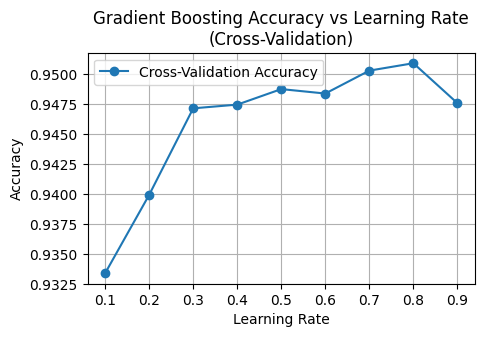

Best Learning Rate: 0.8
Best Cross-Validation Accuracy: 0.951


'\nHow It Works\n\nWe test 9 different learning rates (0.1–0.9) to see which yields the highest validation accuracy.\n\n5‑fold CV provides a robust estimate of generalization performance for each setting.\n\nThe plot helps visualize where accuracy peaks, guiding hyperparameter selection.\n\nFinally, we pick and print the learning rate that achieved the best mean CV accuracy.'

In [17]:
from sklearn.ensemble import GradientBoostingClassifier       # import Gradient Boosting algorithm
from sklearn.model_selection import cross_val_score          # import cross‑validation helper
import matplotlib.pyplot as plt                              # import plotting library
import numpy as np                                           # import numerical tools

# Define list to store mean cross‑validation accuracies
cv_mean_accuracy = []                                        # container for average scores

# Try learning_rate values from 0.1 to 0.9
learning_rates = [n * 0.1 for n in range(1, 10)]            # generate [0.1, 0.2, …, 0.9]

for lr in learning_rates:
    forest_test = GradientBoostingClassifier(
        learning_rate=lr,                                    # set current learning rate
        random_state=42                                      # fix seed for reproducibility
    )
    # Perform 5‑fold CV on training data, scoring by accuracy
    scores = cross_val_score(
        forest_test,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_mean_accuracy.append(np.mean(scores))                 # store the mean accuracy

# Plot CV accuracy versus learning rate
plt.figure(figsize=(5, 3))                                  # set figure size
plt.plot(
    learning_rates,
    cv_mean_accuracy,
    label="Cross-Validation Accuracy",
    marker='o'                                               # circular markers at each rate
)
plt.ylabel("Accuracy")                                      # y‑axis label
plt.xlabel("Learning Rate")                                 # x‑axis label
plt.title("Gradient Boosting Accuracy vs Learning Rate\n(Cross-Validation)")  # title
plt.legend()                                                # show legend
plt.grid(True)                                              # enable grid lines
plt.show()                                                  # display the plot

# Identify best learning_rate and its accuracy
best_index         = np.argmax(cv_mean_accuracy)            # index of highest mean score
best_learning_rate = learning_rates[best_index]            # corresponding learning rate
best_accuracy      = cv_mean_accuracy[best_index]           # best mean accuracy

# Output the results
print(f"Best Learning Rate: {best_learning_rate}")          # display optimal rate
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")  # display its CV accuracy
'''
How It Works

We test 9 different learning rates (0.1–0.9) to see which yields the highest validation accuracy.

5‑fold CV provides a robust estimate of generalization performance for each setting.

The plot helps visualize where accuracy peaks, guiding hyperparameter selection.

Finally, we pick and print the learning rate that achieved the best mean CV accuracy.'''

### 4.5. Train & Evaluate the Best Gradient Boosting Classifier

**Objective:**  
Build and benchmark the final Gradient Boosting model using the optimal learning rate (and other tuned hyperparameters such as `max_depth`). We will:

1. **Instantiate** with the chosen hyperparameters.  
2. **Fit** on the full training set.  
3. **Measure inference latency** on both train and test sets.  
4. **Compute core metrics** (accuracy, F1‑score, recall, precision) to assess performance.  
5. **Summarize** results in a cleaned classification report.

---

#### Why Evaluate Latency?  
In production, you need to know how quickly the model can score new URLs. Measuring both train and test prediction times gives an upper bound on throughput and helps identify potential bottlenecks.

#### Core Metrics Recap  
- **Accuracy:** Overall correctness.  
- **F1‑Score:** Balances precision and recall—key when classes are imbalanced.  
- **Recall:** Ability to catch phishing pages (minimize false negatives).  
- **Precision:** Avoid raising too many false alarms (minimize false positives).

---

In [18]:
from sklearn.ensemble import GradientBoostingClassifier      # import the Gradient Boosting algorithm
from sklearn import metrics                                  # import metrics for evaluation
import pandas as pd                                          # import pandas for DataFrame handling
import time                                                  # import time module for timing

# Use the best learning rate found from cross-validation
best_learning_rate = 0.9                                     # set learning rate to optimal value

# Instantiate the model with the chosen learning rate and max_depth
gbc = GradientBoostingClassifier(                            # create Gradient Boosting classifier
    max_depth=4,                                             # restrict tree depth to 4
    learning_rate=best_learning_rate                         # apply optimal learning rate
)

# Fit the model on the training set
gbc.fit(X_train, y_train)                                    # train the model on full training data

# Measure prediction time for training data
start_predict_train = time.time()                            # record start time for train predictions
y_train_gbc = gbc.predict(X_train)                           # predict training labels
end_predict_train = time.time()                              # record end time for train predictions
predict_train_time = end_predict_train - start_predict_train # compute train‑prediction duration

# Measure prediction time for test data
start_predict_test = time.time()                             # record start time for test predictions
y_test_gbc = gbc.predict(X_test)                             # predict test labels
end_predict_test = time.time()                               # record end time for test predictions
predict_test_time = end_predict_test - start_predict_test    # compute test‑prediction duration

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")  # display train‑pred time
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")       # display test‑pred time

# Compute accuracy for train and test sets
acc_train_gbc = metrics.accuracy_score(y_train, y_train_gbc)  # calculate training accuracy
acc_test_gbc  = metrics.accuracy_score(y_test,  y_test_gbc)   # calculate test accuracy
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))  # print train accuracy
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))        # print test accuracy
print()                                                        # blank line for readability

# Compute F1‑score for train and test sets
f1_score_train_gbc = metrics.f1_score(y_train, y_train_gbc)   # calculate training F1‑score
f1_score_test_gbc  = metrics.f1_score(y_test,  y_test_gbc)    # calculate test F1‑score
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))  # print train F1
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))        # print test F1
print()                                                        # blank line

# Compute recall for train and test sets
recall_score_train_gbc = metrics.recall_score(y_train, y_train_gbc)  # calculate training recall
recall_score_test_gbc  = metrics.recall_score(y_test,  y_test_gbc)   # calculate test recall
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))  # print train recall
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))        # print test recall
print()                                                        # blank line

# Compute precision for train and test sets
precision_score_train_gbc = metrics.precision_score(y_train, y_train_gbc)  # calculate training precision
precision_score_test_gbc  = metrics.precision_score(y_test,  y_test_gbc)   # calculate test precision
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))  # print train precision
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))        # print test precision

# Evaluate performance with classification report
report = metrics.classification_report(y_test, y_test_gbc, output_dict=True)  # generate detailed metrics dict
report_df = pd.DataFrame(report).transpose()                                   # convert to DataFrame & transpose

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)  # remove weighted-average row
report_df = report_df.drop(['support'], axis=1)       # remove support column

# Print the cleaned classification report
print("Classification Report:")   # header for the report
print(report_df)                  # display report DataFrame

Prediction Time on Training Data: 0.5532 seconds
Prediction Time on Test Data: 0.0772 seconds
Gradient Boosting Classifier : Accuracy on training Data: 0.985
Gradient Boosting Classifier : Accuracy on test Data: 0.961

Gradient Boosting Classifier : f1_score on training Data: 0.986
Gradient Boosting Classifier : f1_score on test Data: 0.962

Gradient Boosting Classifier : Recall on training Data: 0.985
Gradient Boosting Classifier : Recall on test Data: 0.966

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.958
Classification Report:
           precision    recall  f1-score
0           0.964842  0.957150  0.960980
1           0.958151  0.965669  0.961895
accuracy    0.961443  0.961443  0.961443
macro avg   0.961496  0.961410  0.961438


**How It Works**  
- **Instantiation**: We set `max_depth=4` and apply the best `learning_rate=0.9`.  
- **Timing**: We measure how long predictions take on both sets to gauge inference speed.  
- **Metrics**: We calculate accuracy, F1, recall, and precision on train vs. test to detect overfitting.  
- **Report**: A transposed DataFrame of per-class precision/recall/F1 gives a clear summary; dropping “weighted avg” and “support” focuses on core metrics.  


## 4.6. Gradient Boosting: Top‑20 Feature Importances

This snippet shows how to:

1. Extract feature importances from your trained Gradient Boosting model (`gbc.feature_importances_`).  
2. Pair each importance score with its feature name.  
3. Sort and select the top 20 most important features.  
4. Plot a horizontal bar chart of those top 20 features.  
5. Print the list of their names.

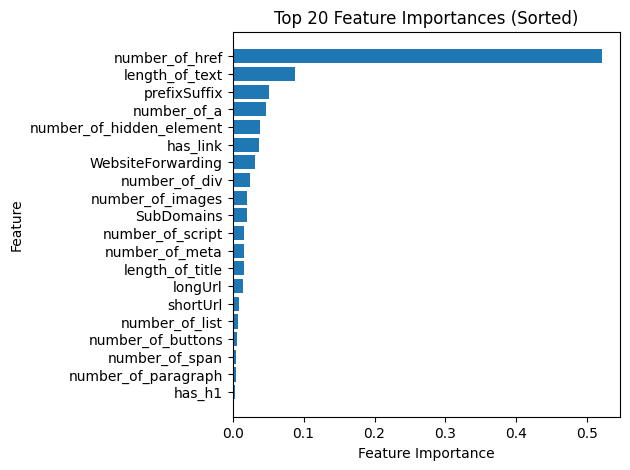

Top 20 Features:
['number_of_href', 'length_of_text', 'prefixSuffix', 'number_of_a', 'number_of_hidden_element', 'has_link', 'WebsiteForwarding', 'number_of_div', 'number_of_images', 'SubDomains', 'number_of_script', 'number_of_meta', 'length_of_title', 'longUrl', 'shortUrl', 'number_of_list', 'number_of_buttons', 'number_of_span', 'number_of_paragraph', 'has_h1']


'  \n How It Works\n\nWe construct a two‑column DataFrame to associate each feature with its learned importance.\n\nSorting lets us rank features by their contribution to the model’s predictive power.\n\nA horizontal bar chart with an inverted y‑axis places the most important features at the top for immediate readability.\n\nFinally, printing the names in list form makes it easy to log or use elsewhere. \n'

In [19]:
# Build a DataFrame mapping features to their importance scores
feature_importance = pd.DataFrame({
    'feature': X_train.columns,                       # get feature names from training DataFrame
    'importance': gbc.feature_importances_             # get importance scores from trained model
})
feature_importance = feature_importance.sort_values(
    'importance', ascending=False                     # sort by importance descending
)

# Select the top 20 most important features
top_20_features = feature_importance.head(20)         # take the first 20 rows

# Plot the top 20 features as a horizontal bar chart
plt.figure(figsize=(5, 5))                            # create a square figure
plt.barh(
    range(len(top_20_features)),                      # y positions 0–19
    top_20_features['importance'],                     # bar lengths = importance values
    align='center'                                    # center bars on ticks
)
plt.yticks(                                           # set y‑tick labels
    range(len(top_20_features)),
    top_20_features['feature'].tolist()               # convert Series to list for labels
)
plt.title("Top 20 Feature Importances (Sorted)")      # add a title
plt.xlabel("Feature Importance")                      # label x‑axis
plt.ylabel("Feature")                                 # label y‑axis
plt.gca().invert_yaxis()                              # invert so the highest importance is on top
plt.show()                                            # render the plot

# Print the list of the top 20 feature names
print("Top 20 Features:")
print(top_20_features['feature'].tolist())            # output the names as a Python list


'''  
 How It Works

We construct a two‑column DataFrame to associate each feature with its learned importance.

Sorting lets us rank features by their contribution to the model’s predictive power.

A horizontal bar chart with an inverted y‑axis places the most important features at the top for immediate readability.

Finally, printing the names in list form makes it easy to log or use elsewhere. 
'''

### Store the results

In [20]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc, predict_test_time)

### 🔍 What Is CatBoost?

CatBoost (Categorical Boosting) is an open‑source gradient boosting library from Yandex, designed to:

1. **Handle categorical features** natively without explicit one‑hot encoding or label encoding.  
2. Use **ordered boosting** and special permutation techniques to reduce **prediction shift** and overfitting.  
3. Build **symmetric trees** (all leaves at the same depth), which can improve inference speed and model compactness.  
4. Provide robust default hyperparameters, often requiring less tuning than other gradient‑boosting implementations.

---

### ⚙️ Learning‑Rate Trade‑Off in CatBoost

- **High learning rate** (e.g. 0.9):  
  - Faster convergence, fewer trees needed, but greater risk of overfitting.  
- **Low learning rate** (e.g. 0.1):  
  - Slower updates, often yields better generalization, but may require more boosting iterations (`n_estimators`).

CatBoost typically tolerates slightly larger learning rates than other libraries due to its ordered boosting, but you should still tune this key parameter.

---

### 🔄 Cross‑Validation Workflow

1. **Define Sweep Range:**  
   `learning_rates = [0.1, 0.2, …, 0.9]`.  
2. **5‑Fold CV for Each Rate:**  
   - Use `cross_val_score` with `cv=5` to average accuracy across folds.  
3. **Record Mean Accuracy:**  
   - Append the mean score for each learning rate.  
4. **Plot Results:**  
   - Visualize accuracy vs. learning rate to see where it peaks.  
5. **Select Optimal Rate:**  
   - Use `np.argmax` to pick the learning rate with the highest CV mean accuracy.

---


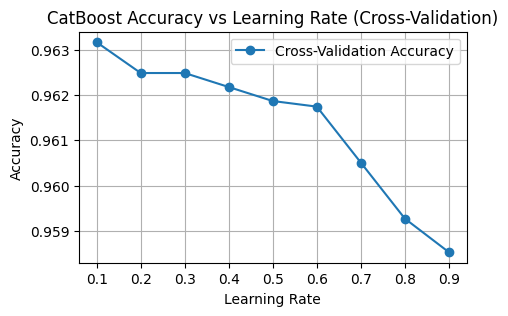

Best Learning Rate: 0.1
Best Cross-Validation Accuracy: 0.963


In [21]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try learning_rate from 0.1 to 0.9
learning_rates = [n * 0.1 for n in range(1, 10)]

for lr in learning_rates:
    forest_test = CatBoostClassifier(learning_rate=lr, verbose=0)

    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(forest_test, X_train, y_train, cv=5, scoring='accuracy')  # type: ignore
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for learning_rate from 0.1 to 0.9
plt.figure(figsize=(5, 3))
plt.plot(learning_rates, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.title("CatBoost Accuracy vs Learning Rate (Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best learning_rate and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_learning_rate = learning_rates[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Output the best learning_rate and corresponding accuracy
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")




### Train the best Model:

In [22]:
from catboost import CatBoostClassifier
from sklearn import metrics
import pandas as pd
import time

# Instantiate the model
cat = CatBoostClassifier(learning_rate=0.1, verbose=0)  # Set verbose=0 to suppress output during training

# Measure training time
start_train_time = time.time()
cat.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Output training time
print(f"Training Time: {train_time:.4f} seconds")

# Measure prediction time for training data
start_predict_train = time.time()
y_train_cat = cat.predict(X_train)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_cat = cat.predict(X_test)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

# Compute and print accuracy, f1_score, recall, precision of the model performance
acc_train_cat = metrics.accuracy_score(y_train, y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test, y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train, y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test, y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train, y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test, y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train, y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test, y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

# Evaluate the model's performance on the test set using classification report
report = metrics.classification_report(y_test, y_test_cat, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)


Training Time: 50.2804 seconds
Prediction Time on Training Data: 0.3258 seconds
Prediction Time on Test Data: 0.1281 seconds
CatBoost Classifier : Accuracy on training Data: 0.988
CatBoost Classifier : Accuracy on test Data: 0.969

CatBoost Classifier : f1_score on training Data: 0.988
CatBoost Classifier : f1_score on test Data: 0.970

CatBoost Classifier : Recall on training Data: 0.986
CatBoost Classifier : Recall on test Data: 0.971

CatBoost Classifier : precision on training Data: 0.990
CatBoost Classifier : precision on test Data: 0.968
Classification Report:
           precision    recall  f1-score
0           0.970515  0.967613  0.969062
1           0.968215  0.971064  0.969638
accuracy    0.969352  0.969352  0.969352
macro avg   0.969365  0.969339  0.969350


### Store the Results:

In [23]:
storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat, predict_test_time)

## 4.7. XGBoost Classifier: Learning‑Rate Sweep & Cross‑Validation

**Objective:**  
Tune the **learning rate** (`eta`) of an XGBoost classifier by sweeping values from 0.1 to 0.9 (in 0.1 steps) and using 5‑fold cross‑validation to estimate the accuracy for each setting.

---

### 🔍 What Is XGBoost?

XGBoost (eXtreme Gradient Boosting) is a high-performance implementation of gradient boosting which:

1. **Optimizes a regularized objective**—adds both L1 (`alpha`) and L2 (`lambda`) penalties to prevent overfitting.  
2. **Uses second‑order Taylor approximation** of the loss function (leveraging both gradients and Hessians) for more precise updates.  
3. **Supports missing values** natively and automatically learns best splits for missing data.  
4. **Implements tree‑pruning (“max_depth” and “gamma”)** and column (feature) subsampling to reduce overfitting.  
5. **Employs cache‑aware block structure and parallel processing** for fast training on large datasets.

---

### ⚖️ The Role of Learning Rate (`eta`)

- Controls how much each new tree contributes to the ensemble:
  \[
    F_{m}(x) = F_{m-1}(x) + \eta \, h_{m}(x)
  \]
  where \(\eta \in (0,1]\) scales the newly added tree’s predictions.
- **High `eta`** speeds up convergence but can overshoot minima and lead to overfitting.
- **Low `eta`** requires more trees (higher `n_estimators`) but often yields better generalization.

---

### 🔄 Cross‑Validation Workflow

1. **Define Sweep Range**  
   `learning_rates = [0.1, 0.2, …, 0.9]`.  
2. **5‑Fold CV for Each Rate**  
   - Train and validate on 5 disjoint folds, averaging the accuracy.  
3. **Record Mean Accuracy**  
   - Store the mean cross‑validation score for each `eta`.  
4. **Visualize**  
   - Plot accuracy vs. `learning_rate` to locate the “sweet spot.”  
5. **Select Optimal Rate**  
   - Use `np.argmax` to pick the best-performing `eta`.

---

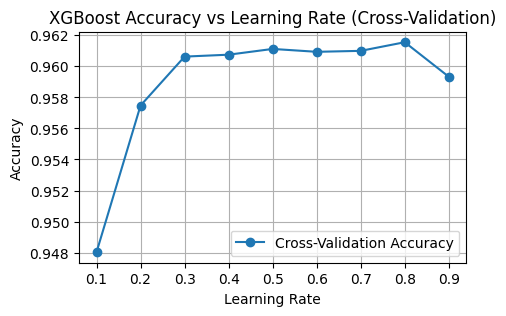

Best Learning Rate: 0.8
Best Cross-Validation Accuracy: 0.962


In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define lists to store cross-validated accuracy scores
cv_mean_accuracy = []

# Try learning_rate from 0.1 to 0.9
learning_rates = [n * 0.1 for n in range(1, 10)]

for lr in learning_rates:
    xgb_model = XGBClassifier(learning_rate=lr, use_label_encoder=False, eval_metric='mlogloss')

    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy.append(np.mean(scores))

# Plotting cross-validation accuracy for learning_rate from 0.1 to 0.9
plt.figure(figsize=(5, 3))
plt.plot(learning_rates, cv_mean_accuracy, label="Cross-Validation Accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.title("XGBoost Accuracy vs Learning Rate (Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# Find the best learning_rate and corresponding accuracy
best_index = np.argmax(cv_mean_accuracy)
best_learning_rate = learning_rates[best_index]
best_accuracy = cv_mean_accuracy[best_index]

# Output the best learning_rate and corresponding accuracy
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.3f}")


### Train the best Model:

In [25]:
from xgboost import XGBClassifier
from sklearn import metrics
import pandas as pd
import time

# Instantiate the model with a learning rate of 0.8
xgb = XGBClassifier(learning_rate=0.8, use_label_encoder=False, eval_metric='logloss')

# Measure training time
start_train_time = time.time()
xgb.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Output training time
print(f"Training Time: {train_time:.4f} seconds")

# Measure prediction time for training data
start_predict_train = time.time()
y_train_xgb = xgb.predict(X_train)
end_predict_train = time.time()
predict_train_time = end_predict_train - start_predict_train

# Measure prediction time for test data
start_predict_test = time.time()
y_test_xgb = xgb.predict(X_test)
end_predict_test = time.time()
predict_test_time = end_predict_test - start_predict_test

# Output prediction times
print(f"Prediction Time on Training Data: {predict_train_time:.4f} seconds")
print(f"Prediction Time on Test Data: {predict_test_time:.4f} seconds")

# Compute and print accuracy, f1_score, recall, precision of the model performance
acc_train_xgb = metrics.accuracy_score(y_train, y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test, y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test, y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_xgb))

# Evaluate the model's performance on the test set using classification report
report = metrics.classification_report(y_test, y_test_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop 'weighted avg' row and 'support' column for clarity
report_df = report_df.drop(['weighted avg'], axis=0)
report_df = report_df.drop(['support'], axis=1)

# Print the classification report
print("Classification Report:")
print(report_df)


Training Time: 1.2554 seconds
Prediction Time on Training Data: 0.0774 seconds
Prediction Time on Test Data: 0.3837 seconds
XGBoost Classifier : Accuracy on training Data: 0.990
XGBoost Classifier : Accuracy on test Data: 0.963

XGBoost Classifier : f1_score on training Data: 0.990
XGBoost Classifier : f1_score on test Data: 0.964

XGBoost Classifier : Recall on training Data: 0.989
XGBoost Classifier : Recall on test Data: 0.966

XGBoost Classifier : precision on training Data: 0.991
XGBoost Classifier : precision on test Data: 0.961
Classification Report:
           precision    recall  f1-score
0           0.965448  0.960638  0.963037
1           0.961445  0.966160  0.963796
accuracy    0.963421  0.963421  0.963421
macro avg   0.963446  0.963399  0.963417


### Store the Results:

In [26]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb, predict_test_time)

## 5. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [27]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'prediction_time' : prediction_time
                      })

In [28]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision,prediction_time
0,K-Nearest Neighbors,0.951,0.952,0.989,0.986,1.321
1,Decision Tree,0.954,0.955,0.991,0.995,0.005
2,Random Forest,0.971,0.971,0.992,0.993,0.057
3,Gradient Boosting Classifier,0.961,0.962,0.985,0.986,0.077
4,CatBoost Classifier,0.969,0.970,0.986,0.990,0.128
5,XGBoost Classifier,0.963,0.964,0.989,0.991,0.384


In [29]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision,prediction_time
0,Random Forest,0.971,0.971,0.992,0.993,0.057
1,CatBoost Classifier,0.969,0.970,0.986,0.990,0.128
2,XGBoost Classifier,0.963,0.964,0.989,0.991,0.384
3,Gradient Boosting Classifier,0.961,0.962,0.985,0.986,0.077
4,Decision Tree,0.954,0.955,0.991,0.995,0.005
5,K-Nearest Neighbors,0.951,0.952,0.989,0.986,1.321


## 6. Storing Best Model

In [30]:
# Instantiate the model
forest = RandomForestClassifier(n_estimators=22)
# Fit the model
forest.fit(X_train, y_train)

,n_estimators,22
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:

import pickle
# Instantiate the model
forest = RandomForestClassifier(n_estimators=22)
# Fit the model
forest.fit(X_train, y_train)
# dump information to that file
res = pickle.dump(forest, open('model.pkl', 'wb'))
print(res)

None
